In [1]:
!pip install datasets

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install seaborn pandas numpy matplotlib sklearn torch 

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple
  Using cached https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/packages/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
# import libraries

import seaborn as sns
import pandas as pd
import numpy as np
#from datasets import list_datasets, load_dataset # hugging face dataset
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import random
import torch
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

import os
import glob
import sys
sys.path.append(os.path.dirname((os.path.abspath(''))))

from datasets import list_datasets, load_dataset
from pprint import pprint

In [5]:
datasets_list = list_datasets() 
#pprint(datasets_list,compact=True) 

Colab craches skip this for now

In [3]:
# use same data as in repo
hate_speech = pd.read_csv("../data/train_tweet.csv")#load_dataset("tweets_hate_speech_detection")

In [5]:
df_hate_speech = hate_speech#hate_speech["train"].to_pandas()

In [6]:
df_hate_speech.shape

(31962, 3)

In [7]:
df_hate_speech['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
df_hate_speech["tweet"]
tweet_df = df_hate_speech.sort_values(by='tweet', ascending=False)
tweet_df

,id,label,tweet
29615,29616,0,ó¾­© duchess ó¾ roxie sinesh ó¾­© â½ #sup...
8385,8386,0,ó¾¬¥ó¾ó¾¬ó¾­ #daughter @user just got #gra...
22314,22315,0,ó¾¬chill time with my fave guilty pleasure an...
11031,11032,0,ó¾¬ó¾¬ó¾¬ love you. ó¾¬ó¾¬ó¾¬ . #sunday ...
4739,4740,0,ó¾ð»ó¾ð»ó¾ð» #sunday #relax #fu...
...,...,...,...
19126,19127,0,#fathersday to all the the #dads and to my ...
18879,18880,0,#bihday on 29/6 44 where has the time gone xx
30673,30674,0,"#90th bihday to #her #majesty the #queen, q..."
8611,8612,0,what you conjure up a smile today?


In [9]:
data = df_hate_speech

C:\Users\D073999\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


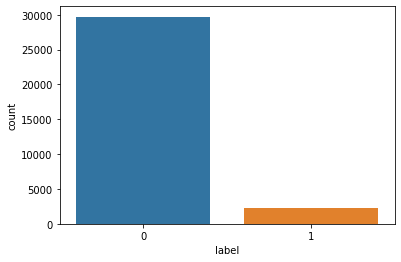

In [10]:
#https://medium.com/analytics-vidhya/twitter-sentiment-analysis-8ef90df6579c
import seaborn as sns
ax=sns.countplot(data.label);

In [11]:
# removing usernames from tweet
data['new_tweet'] = data.tweet.str.replace('@user', '')
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
!pip install emoji
import emoji

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [13]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line
#data["new_tweet"] = data["new_tweet"].str.replace("[^a-zA-Z#]", " ")
data["new_tweet"] = data["new_tweet"].str.replace("#", " ")
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now motivation


In [15]:
# rm html tags
import re as re

data['new_tweet'] = data['new_tweet'].apply(lambda t: re.sub('<.*?>','',t))

In [16]:
data['new_tweet'] = data['new_tweet'].apply(lambda t: emoji.demojize(t.lower(), language='en'))
data.head(30)

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so gr8 !


In [20]:
!pip install autocorrect

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.



  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=654b78b0e1b78f2ffd536400ce87e9ba6e64e63c6c4bb079edb96f7663b21552
  Stored in directory: c:\users\d073999\appdata\local\pip\cache\wheels\8f\4f\32\2230d32fd37dd01c560e2b4d13df51e08b5aa096b4830ddcc9
Successfully built autocorrect


In [17]:
from autocorrect import Speller
data['new_tweet'] = data['new_tweet'].apply(lambda t: Speller(t))
data

NotImplementedError: 
language '  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.    run' not supported
supported languages: en, pl, ru, uk, tr, es, pt, cs, el, it, fr, vi
you can easily add new languages by following instructions at
https://github.com/fsondej/autocorrect/tree/master#adding-new-languages


In [18]:
#tokenization
data["new_tweet"] = data["new_tweet"].apply(lambda x: x.split())
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can't, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide:, society, now, motivation]"


In [19]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
data["new_tweet"]= data["new_tweet"].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can't, use, caus..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide:, societi, now, motiv]"


In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
import string
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
data['new_tweet'] = data['new_tweet'].apply(process)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D073999\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[dysfunct, father, drag, selfish, dysfunction...."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[can't, getthank, offer, pdx., thank, wheelcha..."
2,3,0,bihday your majesty,"[majesti, bihday]"
3,4,0,#model i love u take with u all the time in ...,"[time, urð±!!!, ðððð, u, love, ta..."
4,5,0,factsguide: society now #motivation,"[societi, factsguide:, motiv]"


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
# get individual words
words = []
for line in data["new_tweet"]: 
 words.extend(line)
 
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
 background_color="white",
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

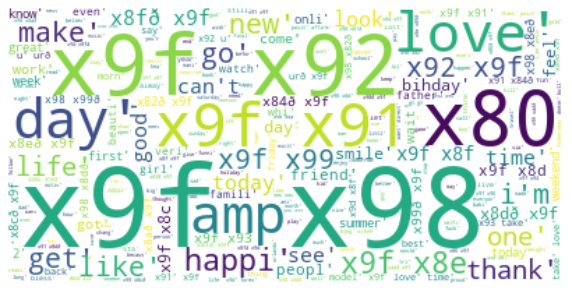

In [18]:
positive = [r for r in data['new_tweet'][data['label']==0]]

pos = ''.join(str(v) for v in positive)#''.join(positive)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

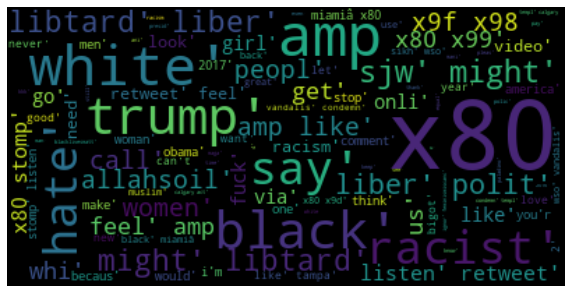

In [ ]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(str(v) for v in negative)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
#Split data into training and testing sets 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

x_train, x_test, y_train, y_test =     train_test_split(data["new_tweet"], 
      data["label"], test_size = 0.2, random_state = 42)

In [23]:
!pip install imblearn

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple

You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


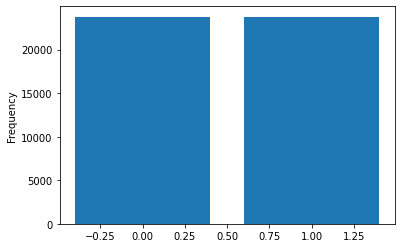

,new_tweet,label
0,"[year/8, becaus, past, â¦, years., attent, pa...",1
1,"[fun, badg, quay, outdoor, salford, gmw, pa, b...",0
2,"[beard, ð», selfi, gayguy, gaystyl, gaymen, ...",0
3,"[true, fashion, fact]",0
4,"[simple,, jewelry!, eleg, muse, share, graciou...",0


In [24]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
x_train_blanaced, y_train_balanced = sampler.fit_resample(np.array(x_train).reshape(-1,1), list(y_train))
data = x_train_blanaced
label = y_train_balanced
class_dist = pd.Series(label).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()
data.flatten()
data = pd.DataFrame(data, columns = ['new_tweet'])
data['label'] = y_train_balanced
data.head()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
xd = pd.Series(x_train_blanaced.flatten())
text = xd.map(' '.join)
x_train_counts = count_vect.fit_transform(text)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_counts.shape)
print(x_train_tfidf.shape)
#Output :(25569, 27304) (25569, 27304)
text = x_test.map(' '.join)
x_test_counts = count_vect.transform(text)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)
#Output : (6393, 27304) (6393, 27304)

(47566, 33166)
(47566, 33166)
(6393, 33166)
(6393, 33166)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_tfidf,y_train_balanced)
predictions = model.predict(x_test_tfidf)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)
#Output: array([[5898,   39],        
#               [ 207,  249]], dtype=int64)
#f1-score
f1_score(y_test,predictions)
#Output : 0.6693548387096774
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100
# output:95.11966213045518

95.11966213045518

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')
# 0.7434062654371809

0.7434062654371809

In [ ]:
#The other classifiers

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=55, max_depth=i)

model = classifier.fit(x_train_tfidf, y_train_balanced)

y_pred = model.predict(x_test_tfidf)
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy_score(y_test,y_pred)*100

92.75770373846395

In [31]:
f1_score(y_test,y_pred, average='macro')

0.7495454737374907

In [33]:
import sklearn.naive_bayes as nb
mnbc = nb.MultinomialNB()
mnbc.fit(x_train_tfidf, y_train_balanced);
yc_pred = mnbc.predict(x_test_tfidf)
accuracy_score(y_test,yc_pred)*100

90.80244016893477

In [34]:
f1_score(y_test,yc_pred, average='macro')

0.7555551914001049